## Roshan Poudel
### LAB 06
#### How noisy data affects validation accuracy ?

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 9ms/step - loss: 0.6055 - accuracy: 0.8116 - val_loss: 0.2901 - val_accuracy: 0.9142
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2577 - accuracy: 0.9191 - val_loss: 0.1896 - val_accuracy: 0.9433
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1739 - accuracy: 0.9460 - val_loss: 0.1792 - val_accuracy: 0.9481
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.1565 - val_accuracy: 0.9545
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0919 - accuracy: 0.9709 - val_loss: 0.1583 - val_accuracy: 0.9550
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0685 - accuracy: 0.9791 - val_loss: 0.1761 - val_accuracy: 0.9500
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.1206 - val_accuracy: 0.9662
Epoch 

**Plotting a validation accuracy comparison**

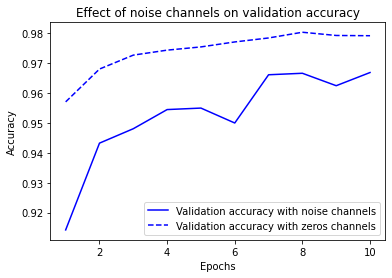

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()